# <font color='#eb3483'>  Exploratory Data Analysis </font>
## <font color='#eb3483'> 5. Comparisons </font>

The final stage of our EDA journey is going to be to look at the relationship between variables in our data. The goal of this stage is to get a better understanding of how our data interacts with each other (i.e. is engine size correlated with co2 emission?). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) #Set our seaborn aesthetics (we're going to customize our figure size)

#Sometimes pandas gives us a lot of warnings, for the sake of simplicity, let's ignore them for this class
import warnings
warnings.filterwarnings("ignore")

### <font color='#eb3483'> Data Loading </font>

We load the previous dataset (this works assuming you have the previous lesson folder next to today's lesson!)

In [2]:
vehicles = pd.read_pickle("data/vehicles.3.grouped.pkl")

In [3]:
vehicles.dtypes[0] in ['float64', 'int32']

True

We're also going to keep a list of numeric and categorical columns to help us out throughout the notebook.

In [4]:
numerical_variables = vehicles.select_dtypes(include=[np.number]).columns
categorical_variables = vehicles.select_dtypes(include=['object', 'category']).columns

In [5]:
vehicles.head()

,co2,consumption_mpg,cylinders,displacement,drive,fuel,make,model,transmission,vehicle_class,year,vehicle_class_type,vehicle_class_types,drive_type,transmission_type,fuel_type,displacement_type,consumption_type,co2_type,consumption_liters_mile
0,423.190476,21,4.0,2.0,Rear-Wheel Drive,Regular,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985,Small Cars,NaN,two,Manual,Normal,very small,low,low,0.180258
1,807.909091,11,12.0,4.9,Rear-Wheel Drive,Regular,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985,Small Cars,NaN,two,Manual,Normal,very big,very high,very high,0.344128
2,329.148148,27,4.0,2.2,Front-Wheel Drive,Regular,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985,Small Cars,NaN,two,Manual,Normal,small,very low,very low,0.140200
3,807.909091,11,8.0,5.2,Rear-Wheel Drive,Regular,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985,Vans,NaN,two,Automatic,Normal,very big,very high,very high,0.344128
4,467.736842,19,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993,Small Cars,NaN,four,Manual,Premium,small,moderate,moderate,0.199232


## <font color='#eb3483'> Multiple group counts </font>

In [6]:
def pivot_count(df, rows, columns):
    df_pivot = df.pivot_table(values="year", # could be any column, since we are just counting rows 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [8]:
consumption_by_fuel = pivot_count(vehicles, "fuel_type","consumption_type")
consumption_by_fuel

consumption_type,very low,low,moderate,high,very high
fuel_type,,,,,
Hybrid,86.0,14.0,2.0,2.0,NaN
Normal,5968.0,5040.0,5837.0,3182.0,4579.0
Other types of fuel,613.0,374.0,542.0,494.0,589.0
Premium,1641.0,2404.0,3956.0,1209.0,1662.0


In [9]:
def heatmap_count_types(df, col1, col2):
    if col1 == col2:
        #Plot a distribution of the data if we don't have different columns
        if df[col1].dtype in ['float64', 'int64']:
            df[col1].plot.hist()
        elif df[col1].dtype == 'category':
            df[col1].value_counts().plot.barh()
        else:
            df[col1].plot.barh()
    else:
        #Otherwise make a meatmap
        pivot_table = pivot_count(df,col1, col2)
        sns.heatmap(pivot_table, annot=True, fmt='g')

In [10]:
interact(heatmap_count_types, col1=vehicles.columns.drop(["make", "model", "year"]),
                              col2=vehicles.columns.drop(["make", "model", "year"]),
                              df=fixed(vehicles));

interactive(children=(Dropdown(description='col1', options=('co2', 'consumption_mpg', 'cylinders', 'displaceme…

### <font color='#eb3483'> Conclusions </font>

- There are more 2 wheel drive cars than 4wheel drive
- Manufacturers focus on small engines/low consumption or big engines/high consumption 
- Most cars have automatic transmission, with small cars having equal number of automatic/manual cars
- Trucks are generally more pollutant than any other car

## <font color='#eb3483'> Categorical Variable Means </font>

Here instead of doing counts, we are calculate the mean of numerical variables aggregated by categorical variables (after removing outliers)

In [11]:
def means_by_category(col_group, col_calc):
    vehicles_no_outliers = vehicles[vehicles[col_calc]<vehicles[col_calc].quantile(0.99)]
    vehicles_no_outliers.groupby(col_group)[col_calc].mean().plot.barh()   
    sns.mpl.pyplot.xlabel('Mean values for variable {}'.format(col_calc))


In [12]:
columns_type = [col for col in vehicles.columns if col.endswith("_type")]

In [13]:
interact(means_by_category, col_group=categorical_variables, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_group', options=('drive', 'fuel', 'make', 'model', 'transmissi…

#### <font color='#eb3483'> Conclusions </font>

- Vehicles with automatic transmission have slightly lower co2 and consumption values

- Vans and trucks have the highest consumption (around 0.25 liters/mile). Station wagons and small cars have the lowest average consumption (around 0.15 liters/mile).

- Hybrid vehicles produce less than half the co2 than any other vehicle.

### <font color='#eb3483'> Means by multiple groups </font>

In [14]:
def pivot_mean(rows, columns, calc_field):
    df_pivot = vehicles.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.mean
                             ).dropna(axis=0, how='all')
    return df_pivot

In [15]:
pivot_mean("fuel_type","vehicle_class_type", "co2")

vehicle_class_type,Large Cars,Medium Cars,Small Cars,Special Vehicles,Station Wagons,Trucks,Vans
fuel_type,,,,,,,
Hybrid,242.714286,124.066667,147.560976,NaN,90.000000,NaN,106.000000
Normal,457.413166,406.311754,383.426379,543.495713,397.367996,558.889427,590.042953
Other types of fuel,444.806776,408.561853,345.571387,559.031182,379.002374,548.503244,602.271645
Premium,514.004549,472.660571,464.510799,592.463894,439.610942,640.534907,547.793508


In [16]:
def heatmap_means_types(col1, col2, col3):
    if col1 == col2 or col1 == col3 or col2 == col3:
        print('Please pick different columns for pivot.')
        return
    pivot_table = pivot_mean(col1, col2, col3)
    sns.heatmap(pivot_table, annot=True, fmt='g')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [19]:
interact(heatmap_means_types, col1=categorical_variables, col2=categorical_variables, col3=numerical_variables);

interactive(children=(Dropdown(description='col1', options=('drive', 'fuel', 'make', 'model', 'transmission', …

#### <font color='#eb3483'> Conclusions </font>
- Trucks using premium gas have a 38% higher fuel consumption compared to small cars that use the same fuel type

## <font color='#eb3483'> Trend comparison </font>

In those datasets where we have a temporal variable (a date), we can analyze the variables related to time. For this kind of analysis trendlines are ideal

In [24]:
vehicles_pre_2018 = vehicles.query("year < 2018")

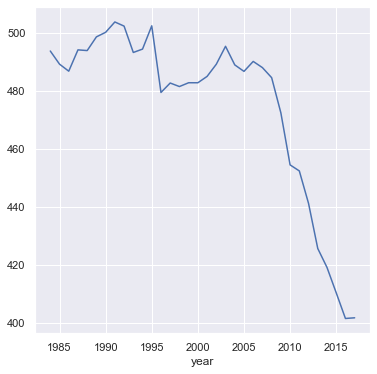

In [25]:
vehicles.query("year < 2018").groupby('year')['co2'].mean().plot();

We see co2 is been in decline for a few years

In [26]:
def mean_trend(col_calc):
    vehicles_pre_2018.groupby('year')[col_calc].mean().plot()
    plt.ylabel(col_calc)
    plt.title("{} evolution over time".format(col_calc))
    plt.show()

In [27]:
interact(mean_trend, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_calc', options=('co2', 'consumption_mpg', 'cylinders', 'displa…

We see that co2 emission and consumption has been declining steadily, while displacement and cylinders peaked in 2009 and its been declining since.

In [35]:
def count_trend(col_calc):
    for category in vehicles_pre_2018[col_calc].unique():
        n_vehicles_category_year = vehicles_pre_2018[vehicles_pre_2018[col_calc]==category].groupby(
            'year').apply(np.size)
        try:
            plt.plot(
                n_vehicles_category_year.index,
                n_vehicles_category_year,
                label=category
            )
        except ZeroDivisionError:
            pass
        plt.legend()

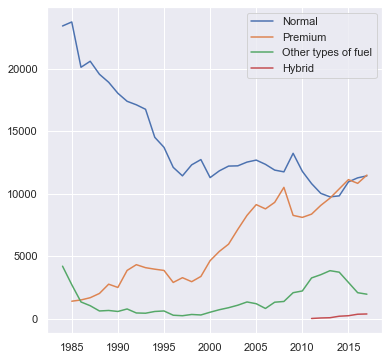

In [36]:
count_trend("fuel_type")

InvalidIndexError: (slice(None, None, None), None)

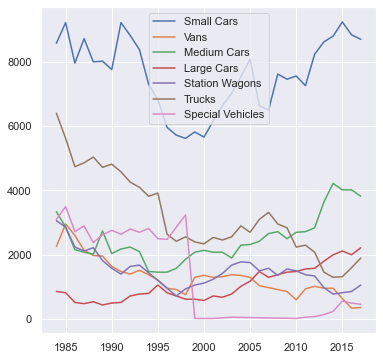

In [37]:
count_trend("vehicle_class_type")

##  <font color='#eb3483'> Correlations </font>

An easy way to visually see all correlations is by using the `pairplot` function we learned with seaborn. However, this only works when there aren't many columns. 

**Note** Scatterplot matrices computation are a bit heavy, this might take a while in your computer.

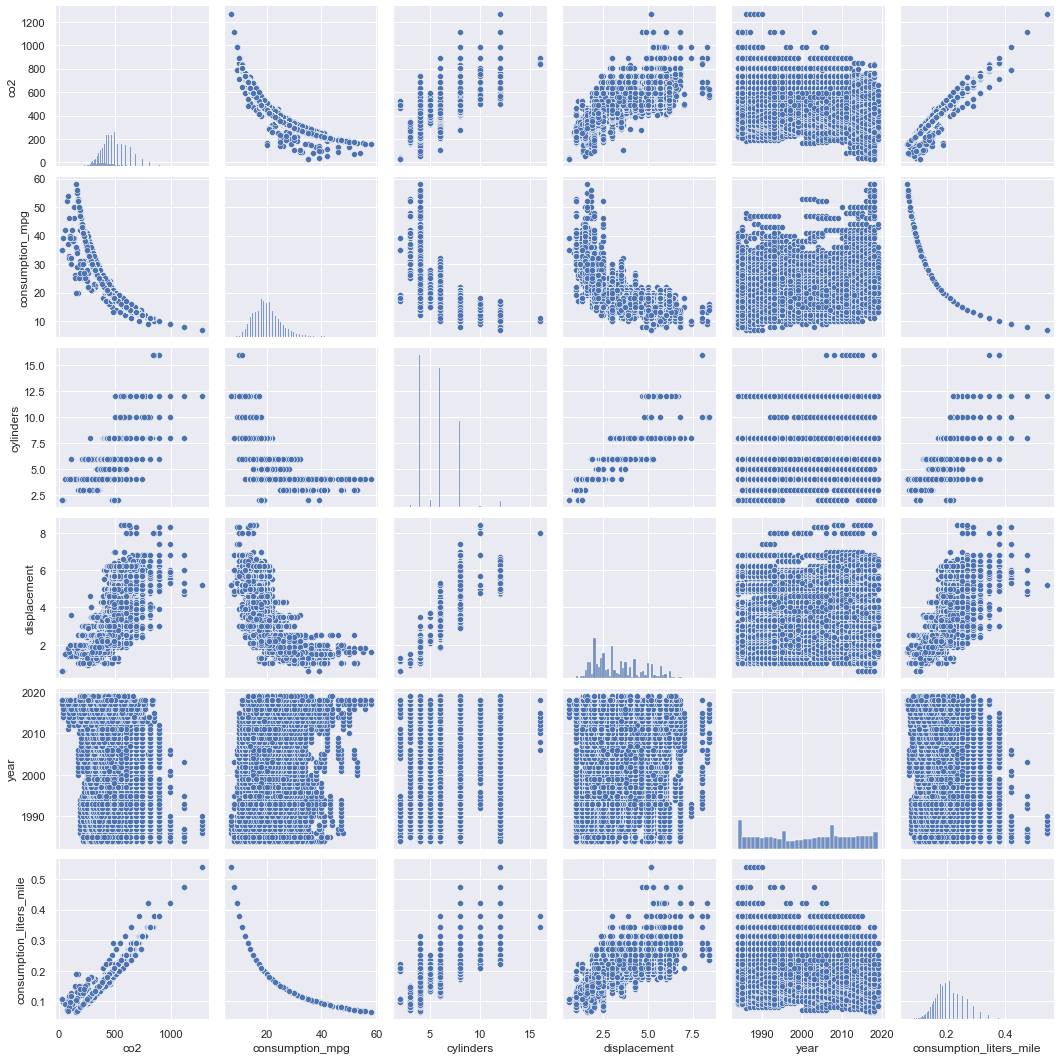

In [38]:
sns.pairplot(vehicles)

We can use `corr` to see the correlations numerically instead

In [39]:
vehicles.corr()

,co2,consumption_mpg,cylinders,displacement,year,consumption_liters_mile
co2,1.000000,-0.924164,0.749703,0.800167,-0.234040,0.993458
consumption_mpg,-0.924164,1.000000,-0.696077,-0.743464,0.212151,-0.927922
cylinders,0.749703,-0.696077,1.000000,0.903728,0.071252,0.745465
displacement,0.800167,-0.743464,0.903728,1.000000,0.028551,0.789953
year,-0.234040,0.212151,0.071252,0.028551,1.000000,-0.219121
consumption_liters_mile,0.993458,-0.927922,0.745465,0.789953,-0.219121,1.000000


We see the variables `consumption_liters_mile and co2` are highly correlated (corr=0.99). Similarly, variables `displacement and cylinders` are highly correlated.

We can use `seaborn.regplot` to plot a regression line on top of a scatter plot to see the relationship between the variables.

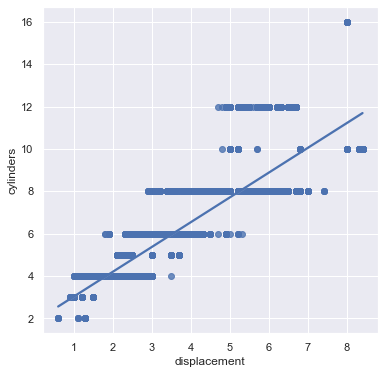

In [40]:
sns.regplot("displacement", "cylinders", data=vehicles);

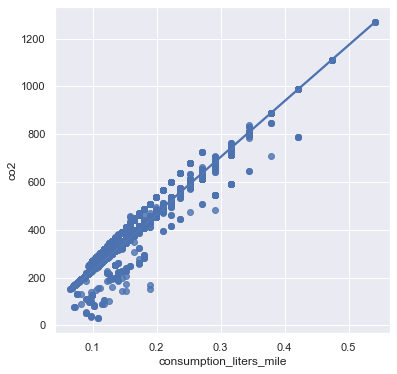

In [41]:
sns.regplot("consumption_liters_mile", "co2", data=vehicles);

Once we have finished the analyisis, the last step is to compile all of our findings and put it on one document. This document serves 2 purposes:

- It helps inform people in the future of our findings. That person might even ourselves!.
- Facilitate the replication of the analysis by other Data Scientists.

Let's summarize all the work we've done!

# <font color='#eb3483'> Analysis Conclusion </font>

### <font color='#eb3483'> Description </font>

The dataset contains co2 pollution and fuel consumption for vehicules sold in the US since 1985, alongside each vehicle's technical specifications.

The original dataset is located at: https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip

The entities associated to the dataset are:

* make
* make-model
* make-model-year
* make-year

### <font color='#eb3483'> Data dictionary </font>

The variables that exist on the dataset are:

```
* co2 (float).
* consumption_mpg (int). Miles per galong fuel consumption
* cylinders (float). Number of cylinders in the engine
* displacement (float) volume of gas displaced by the engine
* drive (categorical). Drive type
* fuel (categorical). Type of fuel
* make (categorical). Car manufacturer
* model (categorical). Model name
* transmission (categorical). Transmission type
* vehicle_class (categorical). Vehicle class
* year (int). Year the car was released.
```

### <font color='#eb3483'> QA </font>

- There are 1506 duplicate rows (we have removed them)
- The variables `cylinders, displacement, drive and transmission` have missing values
- The variable `fuel_type` has a dominant class (65% of cars have `Regular` fuel)
- There are outliers in the variables `co2 and consumption_mpg`
- There are hybrid and electric cars (we have remove the purely electric cars because they dont pollute).

### <font color='#eb3483'> Variable Distributions </font>

- Variable `consumption_mpg` has been converted into `consumption_liters_mile` so we can compare it with the variable `co2`.

- No numerical variable follows a normal distribution
- The variable `cylinders` has an unbalanced discrete distribution (the values 4, 6 and 8 account for 95% of the vehicles). We could group it into ` 4, 6, 8 and Other`.
- The top manufacturer is Chevrolet (10% of total )
- 65% of cars use regular gas
- 2/3 of cars have automatic transmission
- more than 2/3 of cars have 2 wheel drive
- most common vehicle type is small cars (40% of total)

### <font color='#eb3483'> Comparisons </font>

- There are more 2 wheel drive cars than 4wheel drive
- Manufacturers focus on small engines/low consumption or big engines/high consumption 
- Most cars have automatic transmission, with small cars having equal number of automatic/manual cars
- Trucks are generally more pollutant than any other car
- Vehicles with automatic transmission have slightly lower co2 and consumption values
- Vans and trucks have the highest consumption (around 0.25 liters/mile). Station wagons and small cars have the lowest average consumption (around 0.15 liters/mile).
- Hybrid vehicles produce less than half the co2 than any other vehicle.
- Trucks using premium gas have a 38% higher fuel consumption compared to small cars that use the same fuel type.
- Co2 emission and fuel consumption have been declining steadily since 2006, while displacement and cylinders peaked in 2009 and are been declining since.
- The variables consumption_liters_mile and co2 are highly correlated (corr=0.99)
- The variables displacement and cylinders are highly correlated (corr=0.90)
